# Proyecto: Predicción de Alertas Térmicas mediante Aprendizaje Automático

Alumno: Mariano Buet

Se propone desarrollar un modelo de clasificación multiclase que prediga tres tipos de estados térmicos —riesgo de helada, clima de confort y riesgo de sobrecalor— a partir de variables meteorológicas.
El objetivo principal es anticipar condiciones extremas para apoyar la toma de decisiones preventivas en distintos ámbitos: agrícola (proteger cultivos), doméstico (evitar congelamiento de cañerías) e industrial (ajustar sistemas de ventilación o riego)

In [1]:
# Librerías principales
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Leer el archivo Excel directamente desde GitHub
url = "https://github.com/MarianoBuet/Aprendizaje-Autom-tico/raw/main/Entregas_Parcial/datos/Estad%C3%ADsticas%20normales%20Datos%20abiertos%201991-2020%20-%20AJUSTADO.xlsx"

df = pd.read_excel(url,header=0)
# Mostrar las primeras filas
df.head()

,Estacion,Mes,Dias de Lluvia,Humeda,Nubosidad,Precipitacion,Temp Media,Temp Max,Temp Min,Viento,Objetivo
0,AEROPARQUE AERO,Ene,6.7,67.0,3.1,117.5,24.5,28.4,20.8,16.8,NORMAL
1,AEROPARQUE AERO,Feb,6.0,69.8,3.2,112.3,23.7,27.3,20.2,15.8,NORMAL
2,AEROPARQUE AERO,Mar,5.9,71.3,3.1,111.8,22.0,25.5,18.8,14.9,NORMAL
3,AEROPARQUE AERO,Abr,6.6,73.6,3.5,108.3,18.5,22.0,15.3,13.9,NORMAL
4,AEROPARQUE AERO,May,5.0,76.4,4.0,83.3,15.2,18.4,12.3,12.9,NORMAL


In [3]:
# Mostrar columnas y primeras filas
print("Columnas:")
print(df.columns.tolist())
print("\nPrimeras filas:")
print(df.head())

Columnas:
['Estacion', 'Mes', 'Dias de Lluvia', 'Humeda', 'Nubosidad', 'Precipitacion', 'Temp Media', 'Temp Max', 'Temp Min', 'Viento', 'Objetivo']

Primeras filas:
          Estacion  Mes  Dias de Lluvia  Humeda  Nubosidad  Precipitacion  \
0  AEROPARQUE AERO  Ene             6.7    67.0        3.1          117.5   
1  AEROPARQUE AERO  Feb             6.0    69.8        3.2          112.3   
2  AEROPARQUE AERO  Mar             5.9    71.3        3.1          111.8   
3  AEROPARQUE AERO  Abr             6.6    73.6        3.5          108.3   
4  AEROPARQUE AERO  May             5.0    76.4        4.0           83.3   

   Temp Media  Temp Max  Temp Min  Viento Objetivo  
0        24.5      28.4      20.8    16.8   NORMAL  
1        23.7      27.3      20.2    15.8   NORMAL  
2        22.0      25.5      18.8    14.9   NORMAL  
3        18.5      22.0      15.3    13.9   NORMAL  
4        15.2      18.4      12.3    12.9   NORMAL  


# Analisis General del Set de Datos

Estructura General y tipos de variables

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Estacion        1171 non-null   object 
 1   Mes             1171 non-null   object 
 2   Dias de Lluvia  1061 non-null   float64
 3   Humeda          1110 non-null   float64
 4   Nubosidad       1166 non-null   float64
 5   Precipitacion   1061 non-null   float64
 6   Temp Media      1167 non-null   float64
 7   Temp Max        1158 non-null   float64
 8   Temp Min        1124 non-null   float64
 9   Viento          708 non-null    float64
 10  Objetivo        1171 non-null   object 
dtypes: float64(8), object(3)
memory usage: 100.8+ KB


Analisis de los valores nulos

In [5]:
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
Estacion            0
Mes                 0
Dias de Lluvia    110
Humeda             61
Nubosidad           5
Precipitacion     110
Temp Media          4
Temp Max           13
Temp Min           47
Viento            463
Objetivo            0
dtype: int64


Analisis de las variables numéricas

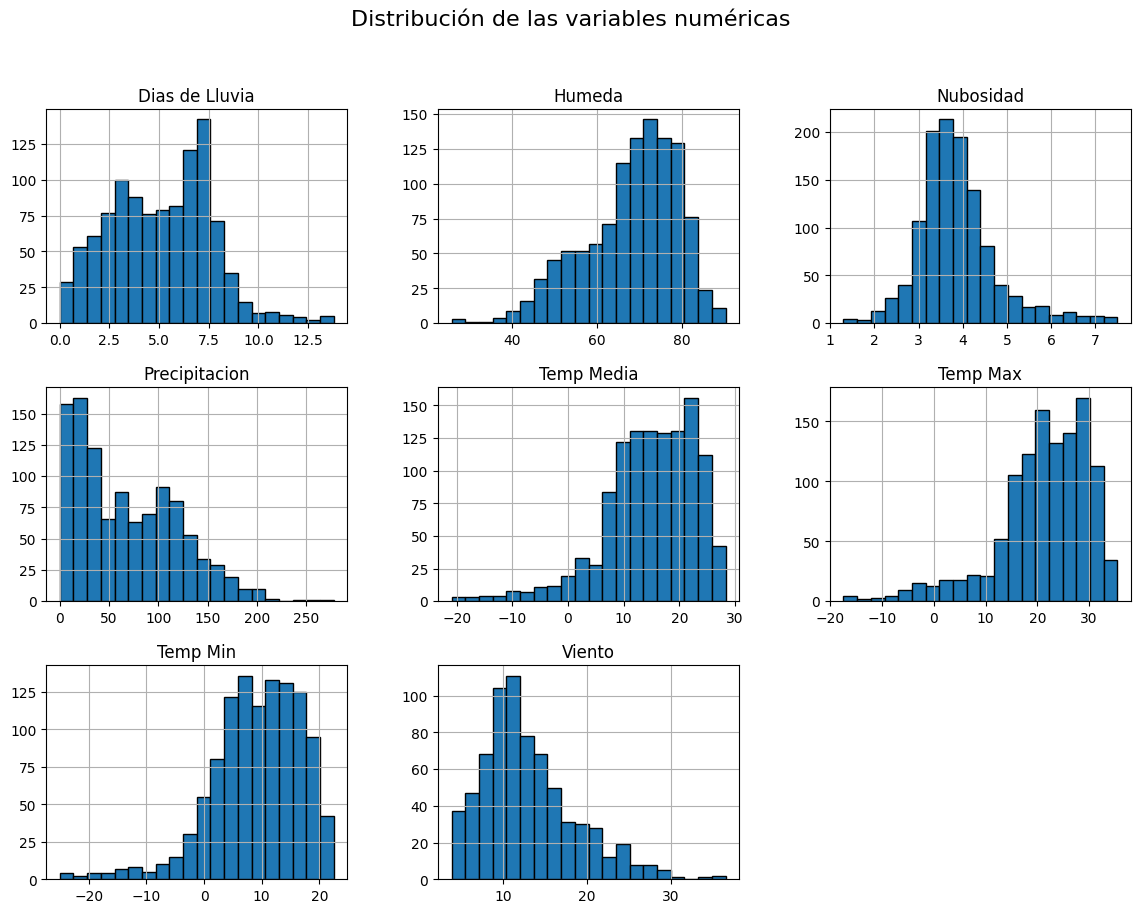

In [6]:
variables_numericas = df.select_dtypes(include=['float64', 'int64']).columns

df[variables_numericas].hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.suptitle("Distribución de las variables numéricas", fontsize=16)
plt.show()

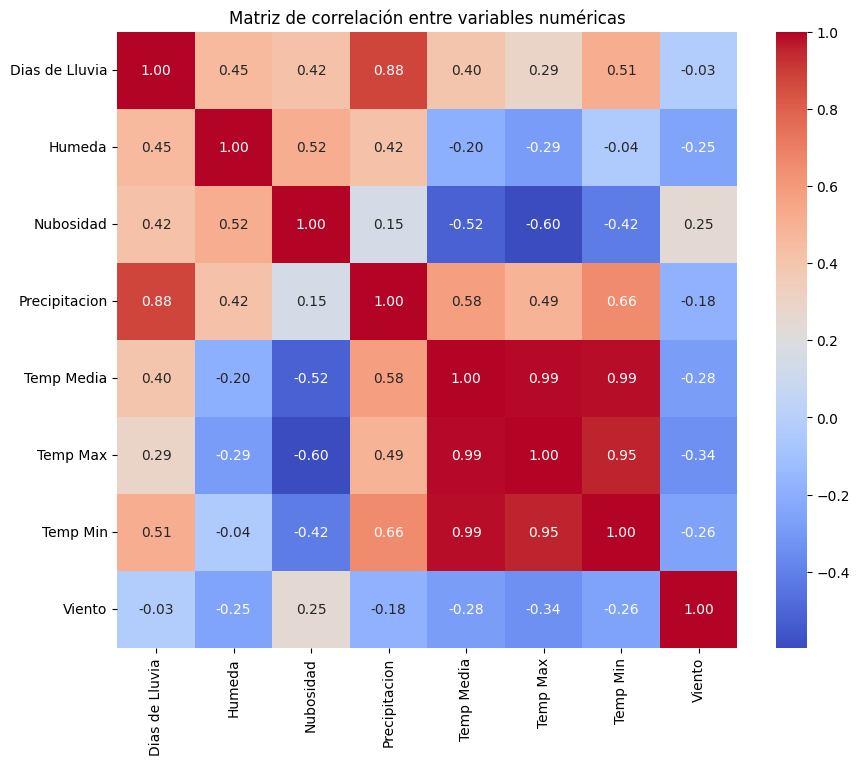

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[variables_numericas].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

In [ ]:
#Visualizar con un histograma la distribucion de la variable objetivo

